# Inputs
---

In [1]:
import numpy as np, zarr, nrrd
# alignment functions
from bigstream.align import alignment_pipeline
from bigstream.transform import apply_transform
import tifffile

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
p1      = '/u/home/f/f7xiesnm/project-zipursky/data/01_fused'
p2      = '/u/home/f/f7xiesnm/project-zipursky/data/03_flatfused'
outdir = '/u/home/f/f7xiesnm/project-zipursky/easifish/results/viz_sparse06_jan23'
!mkdir -p $outdir

In [3]:
!ls $p1

cdf03_c3-2_r1_export.n5		    easi002_1_r1_export.n5
cdf4_c3-2_sample1_r1_export.n5	    easi002_2_r1_export.n5
demo_small_autos1_export.n5	    easi002_2_r2_export.n5
demo_small_autos1_stitch_export.n5  lt185_r1_export.n5
demo_small_s1_export-ds-try10.n5    lt186_r1_export.n5
easi001_1_r1_export.n5		    sparse06_r1_autos1_export.n5
easi001_2_r1_export.n5


In [4]:
!ls $p2

sparse06_r1_autos1_flatfused.n5


# s0

In [4]:
path = p1 + f'/sparse06_r1_autos1_export.n5'
zarr_data = zarr.open(store=zarr.N5Store(path), mode='r')
for c in ['c0']:
    img = zarr_data[f'/{c}/s0'] 
    print(img.shape)
    # print(np.max(img), np.min(img))
    # output = outdir+f'/demo_small_s1-ds-try3_{c}_s3.tiff'
    # print(output)
    # tifffile.imwrite(output, img)

(2839, 3966, 4966)


In [10]:
3966/960, 4966/960, 0.13/3, 0.17/4


(4.13125, 5.172916666666667, 0.043333333333333335, 0.0425)

In [5]:
img_s = img[1000]

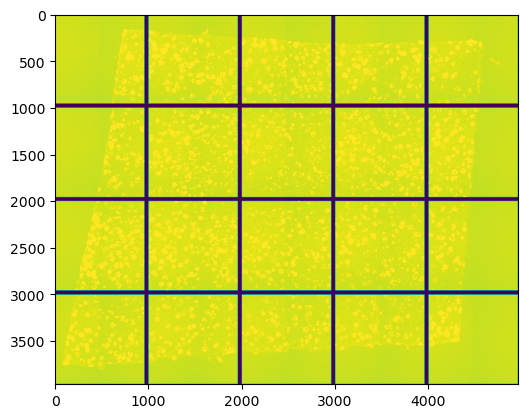

In [6]:
plt.imshow(img_s, 
           vmax=np.percentile(img_s, 95), 
           vmin=np.percentile(img_s, 0.1),)

# s0 - fuseflat

In [6]:
path = p2 + f'/sparse06_r1_autos1_flatfused.n5'

zarr_data = zarr.open(store=zarr.N5Store(path), mode='r')
for c in ['c0']:
    img = zarr_data[f'/{c}/s0'] 
    print(img.shape)
    # print(np.max(img), np.min(img))
    # output = outdir+f'/demo_small_s1-ds-try3_{c}_s3.tiff'
    # print(output)
    # tifffile.imwrite(output, img)

(2839, 3966, 4966)


In [7]:
3966/960, 4966/960, 0.13/3, 0.17/4


(4.13125, 5.172916666666667, 0.043333333333333335, 0.0425)

In [8]:
img_s = img[1000]

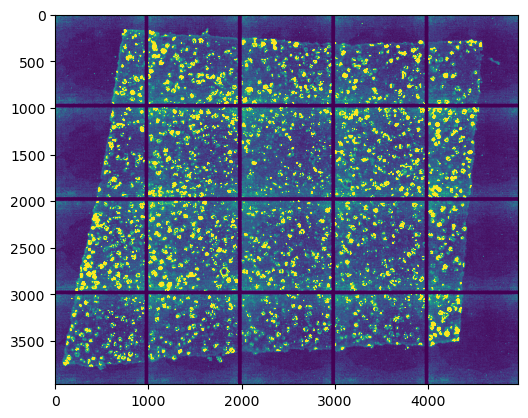

In [9]:
plt.imshow(img_s, 
           vmax=np.percentile(img_s, 95), 
           vmin=np.percentile(img_s, 0.1),)

# s3

In [7]:

rounds = ['r1']
for r in rounds:
    path = p1 + f'/sparse06_{r}_export.n5'
    zarr_data = zarr.open(store=zarr.N5Store(path), mode='r')
    for c in ['c0']:
        img = zarr_data[f'/{c}/s3'] 
        print(img.shape)
        print(np.max(img), np.min(img))
        output = outdir+f'/{r}_{c}_s3_flat.tiff'
        print(output)
        tifffile.imwrite(output, img)

PathNotFoundError: nothing found at path ''

In [ ]:

rounds = ['r1']
for r in rounds:
    path = p2 + f'/sparse06_{r}_flatfused.n5'
    zarr_data = zarr.open(store=zarr.N5Store(path), mode='r')
    for c in ['c0']:
        img = zarr_data[f'/{c}/s3'] 
        print(img.shape)
        print(np.max(img), np.min(img))
        output = outdir+f'/{r}_{c}_s3_flatfused.tiff'
        print(output)
        tifffile.imwrite(output, img)